# Parameter tuning for the 2D no-overlap constraints

Check the other notebooks for basic usage examples.

In [32]:
from ortools.sat.python import cp_model

In [33]:
# Instance
container = (40, 15)
boxes = [
    (11, 3),
    (13, 3),
    (9,  2),
    (7,  2),
    (9,  3),
    (7,  3),
    (11, 2),
    (13, 2),
    (11, 4),
    (13, 4),
    (3,  5),
    (11, 2),
    (2,  2),
    (11, 3),
    (2,  3),
    (5,  4),
    (6,  4),
    (12, 2),
    (1,  2),
    (3,  5),
    (13, 5),
    (12, 4),
    (1,  4),
    (5,  2),
    (6,  2),  # add to make tight
     #(6,3), # add to make infeasible
]


In [34]:
def pack(container, boxes, scale: int, parameter_tuning: bool):
    container = (container[0] * scale, container[1] * scale)
    boxes = [(box[0] * scale, box[1] * scale) for box in boxes]
    model = cp_model.CpModel()
    # We have to create the variable for the bottom left corner of the boxes.
    # We directly limit their range, such that the boxes are inside the container
    x_vars = [model.NewIntVar(0, container[0]-box[0], name = f'x1_{i}') for i, box in enumerate(boxes)]
    y_vars = [model.NewIntVar(0, container[1]-box[1], name = f'y1_{i}') for i, box in enumerate(boxes)]
    # Interval variables are actually more like constraint containers, that are then passed to the no overlap constraint
    # Note that we could also make size and end variables, but we don't need them here
    x_interval_vars = [model.NewIntervalVar(start=x_vars[i], size=box[0], end=x_vars[i]+box[0], name = f'x_interval_{i}') for i, box in enumerate(boxes)]
    y_interval_vars = [model.NewIntervalVar(start=y_vars[i], size=box[1], end=y_vars[i]+box[1], name = f'y_interval_{i}') for i, box in enumerate(boxes)]
    # Enforce that no two rectangles overlap
    model.AddNoOverlap2D(x_interval_vars, y_interval_vars)
        # Solve!
    solver = cp_model.CpSolver()
    solver.parameters.log_search_progress = True
    if  parameter_tuning:
        solver.parameters.use_energetic_reasoning_in_no_overlap_2d = True
        solver.parameters.use_timetabling_in_no_overlap_2d = True
        solver.parameters.use_pairwise_reasoning_in_no_overlap_2d = True
    solver.log_callback = print
    status = solver.Solve(model)
    assert status == cp_model.OPTIMAL
    # plot the solution
    import matplotlib.pyplot as plt
    import matplotlib.patches as patches
    fig, ax = plt.subplots(1)
    ax.set_xlim(0, container[0])
    ax.set_ylim(0, container[1])
    for i, box in enumerate(boxes):
        ax.add_patch(patches.Rectangle((solver.Value(x_vars[i]), solver.Value(y_vars[i])), box[0], box[1], facecolor='blue',alpha=0.2, edgecolor='b'))
    # uniform axis
    ax.set_aspect('equal', adjustable='box')
    plt.show()



Starting CP-SAT solver v9.7.2996
Parameters: log_search_progress: true
Setting number of workers to 8

Initial satisfaction model '': (model_fingerprint: 0xe360a8aa6a1196a)
#Variables: 50
  - 3 in [0,10]
  - 6 in [0,11]
  - 6 in [0,12]
  - 10 in [0,13]
  - 4 in [0,27]
  - 2 in [0,28]
  - 5 in [0,29]
  - 2 in [0,31]
  - 2 in [0,33]
  - 2 in [0,34]
  - 2 in [0,35]
  - 2 in [0,37]
  - 2 in [0,38]
  - 2 in [0,39]
#kInterval: 50
#kLinear1: 50
#kNoOverlap2D: 1 (#rectangles: 25)

Starting presolve at 0.00s
Starting CP-SAT solver v9.7.2996
Parameters: log_search_progress: true
Setting number of workers to 8

Initial satisfaction model '': (model_fingerprint: 0xe360a8aa6a1196a)
#Variables: 50
  - 3 in [0,10]
  - 6 in [0,11]
  - 6 in [0,12]
  - 10 in [0,13]
  - 4 in [0,27]
  - 2 in [0,28]
  - 5 in [0,29]
  - 2 in [0,31]
  - 2 in [0,33]
  - 2 in [0,34]
  - 2 in [0,35]
  - 2 in [0,37]
  - 2 in [0,38]
  - 2 in [0,39]
#kInterval: 50
#kLinear1: 50
#kNoOverlap2D: 1 (#rectangles: 25)

Starting presol

#1      11.81s default_lp fixed_bools:0/775
#1      11.81s default_lp fixed_bools:0/775
#2      11.83s quick_restart fixed_bools:0/795
#3      11.83s quick_restart_no_lp fixed_bools:0/766
#2      11.83s quick_restart fixed_bools:0/795
#3      11.83s quick_restart_no_lp fixed_bools:0/766


Task timing                        n [     min,      max]      avg      dev     time         n [     min,      max]      avg      dev    dtime
  'synchronization_agent':         0 [  0.00ns,   0.00ns]   0.00ns   0.00ns   0.00ns         0 [  0.00ns,   0.00ns]   0.00ns   0.00ns   0.00ns
    'neighborhood_helper':         0 [  0.00ns,   0.00ns]   0.00ns   0.00ns   0.00ns         0 [  0.00ns,   0.00ns]   0.00ns   0.00ns   0.00ns
             'default_lp':         1 [  11.82s,   11.82s]   11.82s   0.00ns   11.82s         1 [634.72ms, 634.72ms] 634.72ms   0.00ns 634.72ms
          'less_encoding':         1 [  11.82s,   11.82s]   11.82s   0.00ns   11.82s         1 [627.03ms, 627.03ms] 627.03ms   0.00ns 627.

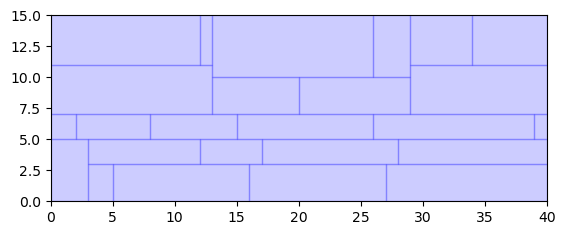

In [35]:
pack(container, boxes, 1, False)



Starting CP-SAT solver v9.7.2996
Starting CP-SAT solver v9.7.2996
Parameters: log_search_progress: true use_timetabling_in_no_overlap_2d: true use_energetic_reasoning_in_no_overlap_2d: true use_pairwise_reasoning_in_no_overlap_2d: true
Parameters: log_search_progress: true use_timetabling_in_no_overlap_2d: true use_energetic_reasoning_in_no_overlap_2d: true use_pairwise_reasoning_in_no_overlap_2d: true
Setting number of workers to 8
Setting number of workers to 8


Initial satisfaction model '': (model_fingerprint: 0xe360a8aa6a1196a)
#Variables: 50
  - 3 in [0,10]
  - 6 in [0,11]
  - 6 in [0,12]
  - 10 in [0,13]
  - 4 in [0,27]
  - 2 in [0,28]
  - 5 in [0,29]
  - 2 in [0,31]
  - 2 in [0,33]
  - 2 in [0,34]
  - 2 in [0,35]
  - 2 in [0,37]
  - 2 in [0,38]
  - 2 in [0,39]
#kInterval: 50
#kLinear1: 50
#kNoOverlap2D: 1 (#rectangles: 25)
Initial satisfaction model '': (model_fingerprint: 0xe360a8aa6a1196a)
#Variables: 50
  - 3 in [0,10]
  - 6 in [0,11]
  - 6 in [0,12]
  - 10 in [0,13]
  - 

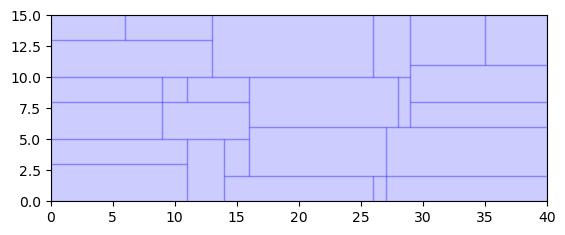

In [36]:
pack(container, boxes, 1, True)



Starting CP-SAT solver v9.7.2996
Parameters: log_search_progress: true
Setting number of workers to 8
Starting CP-SAT solver v9.7.2996
Parameters: log_search_progress: true
Setting number of workers to 8


Initial satisfaction model '': (model_fingerprint: 0xc881a0d8b71e6ab8)
#Variables: 50
  - 3 in [0,100]
  - 6 in [0,110]
  - 6 in [0,120]
  - 10 in [0,130]
  - 4 in [0,270]
  - 2 in [0,280]
  - 5 in [0,290]
  - 2 in [0,310]
  - 2 in [0,330]
  - 2 in [0,340]
  - 2 in [0,350]
  - 2 in [0,370]
  - 2 in [0,380]
  - 2 in [0,390]
#kInterval: 50
#kLinear1: 50
#kNoOverlap2D: 1 (#rectangles: 25)

Starting presolve at 0.00s
[ExtractEncodingFromLinear] #potential_supersets=0 #potential_subsets=0 #at_most_one_encodings=0 #exactly_one_encodings=0 #unique_terms=0 #multiple_terms=0 #literals=0 time=2e-06s
Initial satisfaction model '': (model_fingerprint: 0xc881a0d8b71e6ab8)
#Variables: 50
  - 3 in [0,100]
  - 6 in [0,110]
  - 6 in [0,120]
  - 10 in [0,130]
  - 4 in [0,270]
  - 2 in [0,280]
  - 5 

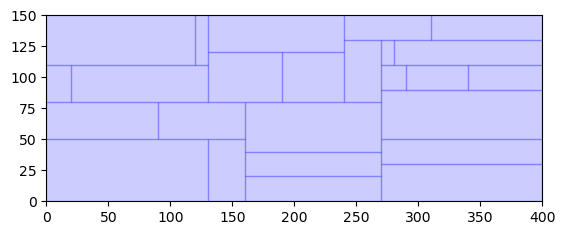

In [37]:
pack(container, boxes, 10, False)



Starting CP-SAT solver v9.7.2996Starting CP-SAT solver v9.7.2996
Parameters: log_search_progress: true use_timetabling_in_no_overlap_2d: true use_energetic_reasoning_in_no_overlap_2d: true use_pairwise_reasoning_in_no_overlap_2d: true
Setting number of workers to 8


Parameters: log_search_progress: true use_timetabling_in_no_overlap_2d: true use_energetic_reasoning_in_no_overlap_2d: true use_pairwise_reasoning_in_no_overlap_2d: true
Setting number of workers to 8

Initial satisfaction model '': (model_fingerprint: 0xc881a0d8b71e6ab8)
#Variables: 50
  - 3 in [0,100]
  - 6 in [0,110]
  - 6 in [0,120]
  - 10 in [0,130]
  - 4 in [0,270]
  - 2 in [0,280]
  - 5 in [0,290]
  - 2 in [0,310]
  - 2 in [0,330]
  - 2 in [0,340]
  - 2 in [0,350]
  - 2 in [0,370]
  - 2 in [0,380]
  - 2 in [0,390]
#kInterval: 50
#kLinear1: 50
#kNoOverlap2D: 1 (#rectangles: 25)

Starting presolve at 0.00s
Initial satisfaction model '': (model_fingerprint: 0xc881a0d8b71e6ab8)
#Variables: 50
  - 3 in [0,100]
  - 6 in

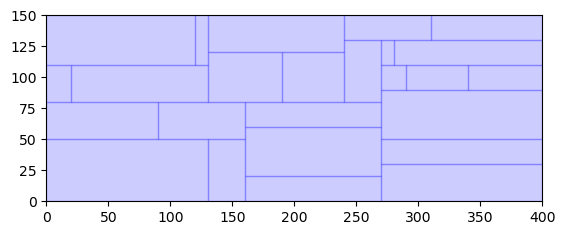

In [38]:
pack(container, boxes, 10, True)



Starting CP-SAT solver v9.7.2996
Starting CP-SAT solver v9.7.2996
Parameters: log_search_progress: true
Setting number of workers to 8
Parameters: log_search_progress: true
Setting number of workers to 8


Initial satisfaction model '': (model_fingerprint: 0x85cdb0b20b4ec279)
#Variables: 50
  - 3 in [0,1000]
  - 6 in [0,1100]
  - 6 in [0,1200]
  - 10 in [0,1300]
  - 4 in [0,2700]
  - 2 in [0,2800]
  - 5 in [0,2900]
  - 2 in [0,3100]
  - 2 in [0,3300]
  - 2 in [0,3400]
  - 2 in [0,3500]
  - 2 in [0,3700]
  - 2 in [0,3800]
  - 2 in [0,3900]
#kInterval: 50
#kLinear1: 50
#kNoOverlap2D: 1 (#rectangles: 25)
Initial satisfaction model '': (model_fingerprint: 0x85cdb0b20b4ec279)
#Variables: 50
  - 3 in [0,1000]
  - 6 in [0,1100]
  - 6 in [0,1200]
  - 10 in [0,1300]
  - 4 in [0,2700]
  - 2 in [0,2800]
  - 5 in [0,2900]
  - 2 in [0,3100]
  - 2 in [0,3300]
  - 2 in [0,3400]
  - 2 in [0,3500]
  - 2 in [0,3700]
  - 2 in [0,3800]
  - 2 in [0,3900]
#kInterval: 50
#kLinear1: 50
#kNoOverlap2D: 1 (#re

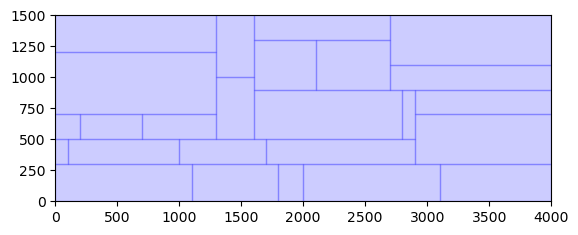

In [39]:
pack(container, boxes, 100, False)



Starting CP-SAT solver v9.7.2996
Parameters: log_search_progress: true use_timetabling_in_no_overlap_2d: true use_energetic_reasoning_in_no_overlap_2d: true use_pairwise_reasoning_in_no_overlap_2d: true
Setting number of workers to 8

Initial satisfaction model '': (model_fingerprint: 0x85cdb0b20b4ec279)
#Variables: 50
  - 3 in [0,1000]
  - 6 in [0,1100]
  - 6 in [0,1200]
  - 10 in [0,1300]
  - 4 in [0,2700]
  - 2 in [0,2800]
  - 5 in [0,2900]
  - 2 in [0,3100]
  - 2 in [0,3300]
  - 2 in [0,3400]
  - 2 in [0,3500]
  - 2 in [0,3700]
  - 2 in [0,3800]
  - 2 in [0,3900]
#kInterval: 50
#kLinear1: 50
#kNoOverlap2D: 1 (#rectangles: 25)
Starting CP-SAT solver v9.7.2996
Parameters: log_search_progress: true use_timetabling_in_no_overlap_2d: true use_energetic_reasoning_in_no_overlap_2d: true use_pairwise_reasoning_in_no_overlap_2d: true
Setting number of workers to 8


Starting presolve at 0.00s
Initial satisfaction model '': (model_fingerprint: 0x85cdb0b20b4ec279)
#Variables: 50
  - 3 in [0

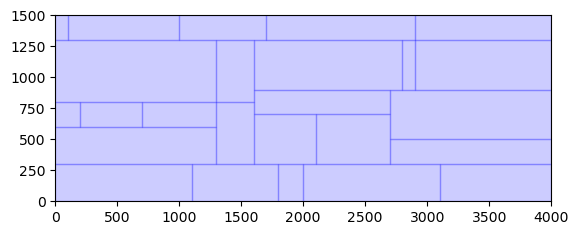

In [40]:
pack(container, boxes, 100, True)



Starting CP-SAT solver v9.7.2996
Parameters: log_search_progress: true
Setting number of workers to 8

Initial satisfaction model '': (model_fingerprint: 0xf3036ed9c0b96d95)
#Variables: 50
  - 3 in [0,10000]
  - 6 in [0,11000]
  - 6 in [0,12000]
  - 10 in [0,13000]
  - 4 in [0,27000]
  - 2 in [0,28000]
  - 5 in [0,29000]
  - 2 in [0,31000]
  - 2 in [0,33000]
  - 2 in [0,34000]
  - 2 in [0,35000]
  - 2 in [0,37000]
  - 2 in [0,38000]
  - 2 in [0,39000]
#kInterval: 50
#kLinear1: 50
#kNoOverlap2D: 1 (#rectangles: 25)

Starting CP-SAT solver v9.7.2996
Parameters: log_search_progress: true
Setting number of workers to 8

Initial satisfaction model '': (model_fingerprint: 0xf3036ed9c0b96d95)
#Variables: 50
  - 3 in [0,10000]
  - 6 in [0,11000]
  - 6 in [0,12000]
  - 10 in [0,13000]
  - 4 in [0,27000]
  - 2 in [0,28000]
  - 5 in [0,29000]
  - 2 in [0,31000]
  - 2 in [0,33000]
  - 2 in [0,34000]
  - 2 in [0,35000]
  - 2 in [0,37000]
  - 2 in [0,38000]
  - 2 in [0,39000]
#kInterval: 50
#kLine

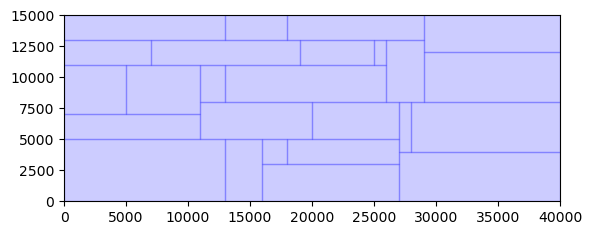

In [41]:
pack(container, boxes, 1000, False)



Starting CP-SAT solver v9.7.2996
Parameters: log_search_progress: true use_timetabling_in_no_overlap_2d: true use_energetic_reasoning_in_no_overlap_2d: true use_pairwise_reasoning_in_no_overlap_2d: true
Setting number of workers to 8

Initial satisfaction model '': (model_fingerprint: 0xee8fad23ead5e348)
#Variables: 50
  - 3 in [0,100000]
  - 6 in [0,110000]
  - 6 in [0,120000]
  - 10 in [0,130000]
  - 4 in [0,270000]
  - 2 in [0,280000]
  - 5 in [0,290000]
  - 2 in [0,310000]
  - 2 in [0,330000]
  - 2 in [0,340000]
  - 2 in [0,350000]
  - 2 in [0,370000]
  - 2 in [0,380000]
  - 2 in [0,390000]
#kInterval: 50
#kLinear1: 50
#kNoOverlap2D: 1 (#rectangles: 25)

Starting presolve at 0.00s
[ExtractEncodingFromLinear] #potential_supersets=0 #potential_subsets=0 #at_most_one_encodings=0 #exactly_one_encodings=0 #unique_terms=0 #multiple_terms=0 #literals=0 time=2e-06s
Starting CP-SAT solver v9.7.2996
Parameters: log_search_progress: true use_timetabling_in_no_overlap_2d: true use_energetic_

#1     2012.54s quick_restart_no_lp fixed_bools:0/41695
#1     2012.54s quick_restart_no_lp fixed_bools:0/41695


Task timing                        n [     min,      max]      avg      dev     time         n [     min,      max]      avg      dev    dtime
  'synchronization_agent':         0 [  0.00ns,   0.00ns]   0.00ns   0.00ns   0.00ns         0 [  0.00ns,   0.00ns]   0.00ns   0.00ns   0.00ns
    'neighborhood_helper':         0 [  0.00ns,   0.00ns]   0.00ns   0.00ns   0.00ns         0 [  0.00ns,   0.00ns]   0.00ns   0.00ns   0.00ns
             'default_lp':         1 [  33.54m,   33.54m]   33.54m   0.00ns   33.54m         1 [  16.58m,   16.58m]   16.58m   0.00ns   16.58m
          'less_encoding':         1 [  33.54m,   33.54m]   33.54m   0.00ns   33.54m         1 [  16.60m,   16.60m]   16.60m   0.00ns   16.60m
                  'no_lp':         1 [  33.54m,   33.54m]   33.54m   0.00ns   33.54m         1 [  15.63m,   15.63m]   15.63m   0.00ns   15.63m
                 'max_lp':  

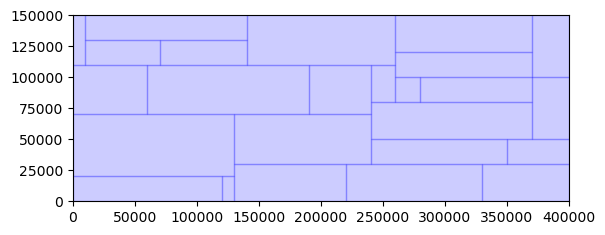

In [42]:
pack(container, boxes, 10000, True)